In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('test_data.csv', decimal=',')

In [3]:
data.head(10)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,17,1200.964697,69.340001,19,1449.001828,120.250001,22
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,11,830.113889,33.439999,12,1042.831595,57.530002,12
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,4,577.039081,20.640001,5,714.554179,32.150001,6
5,6,north america,buyer_2,79419,2124,1110,745,556.720001,237.204412,9.770000,3,315.078178,26.550001,4,389.363610,26.550001,4
6,7,north america,buyer_3,88809,3113,926,603,525.510010,252.857545,15.370000,3,361.393394,32.160001,3,433.872080,32.160001,3
7,8,north america,buyer_3,113917,3966,1249,854,521.509998,306.853212,30.780000,2,484.534634,39.170000,3,770.979189,47.560000,4
8,9,north america,buyer_2,65516,1717,905,685,460.330000,186.115059,25.129999,6,274.565038,29.999999,9,352.509658,60.350000,10
9,10,north america,buyer_2,64739,1899,928,539,416.130001,177.430283,0.000000,0,240.487613,0.000000,0,268.501080,0.000000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campaign_id        87 non-null     int64  
 1   Geo                87 non-null     object 
 2   Buyer              87 non-null     object 
 3   Impressions        87 non-null     int64  
 4   Clicks             87 non-null     int64  
 5   Installs           87 non-null     int64  
 6   Registrations      87 non-null     int64  
 7   Spend              87 non-null     float64
 8   Revenue_ad1d       87 non-null     float64
 9   Revenue_in_app1d   87 non-null     float64
 10  Payers1d           87 non-null     int64  
 11  Revenue_ad7d       87 non-null     float64
 12  Revenue_in_app7d   87 non-null     float64
 13  Payers7d           87 non-null     int64  
 14  Revenue_ad30d      87 non-null     float64
 15  Revenue_in_app30d  87 non-null     float64
 16  Payers30d          87 non-nu

In [5]:
# функции для построения графиков 

def gr(data_gr, ind, figsize=(10, 3)):
    data_plot = data_gr[['Revenue_ad1d', 'Revenue_ad7d', 'Revenue_ad30d']].reset_index().\
    melt(id_vars=ind, var_name='Revenue_ad')
    plt.figure(figsize=figsize)
    plt.title(f'График выручки от зарегистрировавшихся на 1, 7, 30 дни для каждого {ind}')
    sns.barplot(data_plot, x='Revenue_ad', y='value', hue=ind)

def pl1(data_gr, ind, figsize=(10, 3)):
    data_plot1 = data_gr.loc[:, ['Spend', 'Registrations']]
    data_plot1['cost_per_one'] = data_plot1['Spend']/data_plot1['Registrations']
    plt.figure(figsize=figsize)
    plt.title(f'Столбчатый график для затрат на каждого зарегистрировавшегося по каждому {ind}')
    sns.barplot(data_plot1.reset_index(), x=ind, y='cost_per_one')
    
def pl2(data_gr, ind, figsize=(10, 3)):
    data_plot2 = data_gr.loc[:, ['Impressions', 'Registrations', 'Spend', 'Revenue_ad1d', 'Revenue_ad7d', 'Revenue_ad30d']]
    data_plot2['all_revenue'] = data_plot2['Revenue_ad1d'] + data_plot2['Revenue_ad7d'] + data_plot2['Revenue_ad30d']
    data_plot2['proc_rev'] = data_plot2['all_revenue']/data_plot2['Spend']
    data_plot2['proc_reg'] = data_plot2['Registrations']/data_plot2['Impressions']
    plt.figure(figsize=figsize)
    plt.title(f'График прибыли от зарегистрировавшихся для каждого {ind}')
    sns.barplot(data_plot2.reset_index(), x=ind, y='proc_rev')
    plt.show()
    plt.figure(figsize=figsize)
    plt.title(f'График отношения зарегистрировавшихся к предложениям для каждого {ind}')
    sns.barplot(data_plot2.reset_index(), x=ind, y='proc_reg')

In [6]:
data_gr_buy =data.groupby('Buyer').sum().iloc[:, 2: ]

In [7]:
data_gr_buy.head()

,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
Buyer,,,,,,,,,,,,,,
buyer_1,6239438,226710,63265,40161,7211.150000,2689.881901,226.280001,97,3343.217090,295.899998,118,3874.967751,413.729999,124
buyer_2,1929911,50205,24654,14882,7225.449996,3269.035834,144.580000,50,4584.963333,228.420002,69,5624.460621,359.940003,79
buyer_3,336414,11266,3801,2569,1953.720009,1017.940341,72.610000,16,1477.170391,100.550001,21,2046.718896,111.750001,26
buyer_4,312096,7129,2661,1708,1141.070006,485.825644,46.000000,13,676.328329,47.380001,13,886.613370,75.930001,14
buyer_5,1105119,35681,11050,7588,641.039996,128.463054,3.100000,1,189.916670,3.100000,1,211.155590,3.790000,2


**График зависимости прибыли от зарегестрировавшихся на 1, 7, 30 дни для каждого buyer**

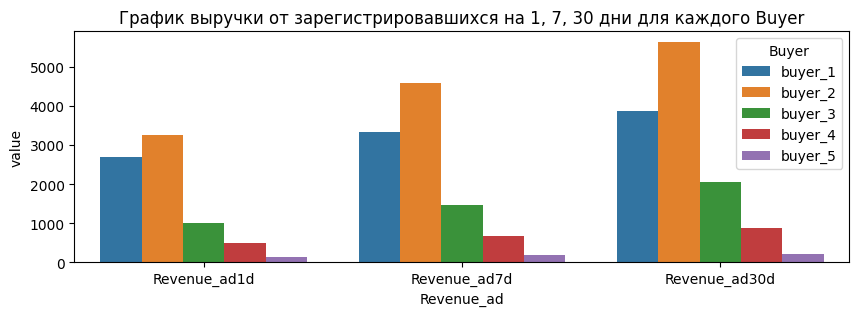

In [8]:
gr(data_gr_buy, 'Buyer')

**График зависимости затрат на каждого зарегистрировавшегося от buyer**

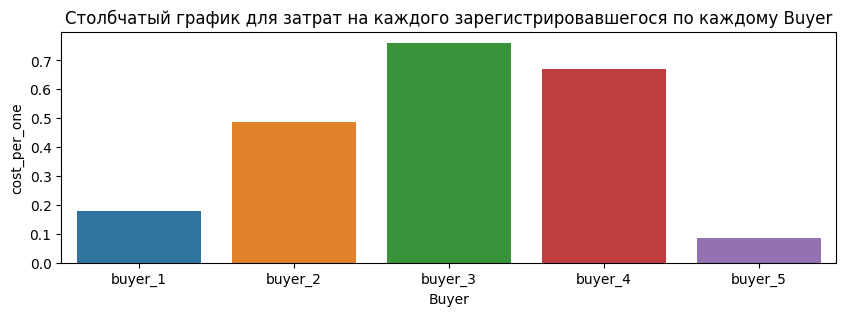

In [9]:
pl1(data_gr_buy, 'Buyer')

**Как окупились затраты на рекламу с прибылью от зарегестрировавшихся и процент зарегистрировавшихся от предложений для каждого buyer**

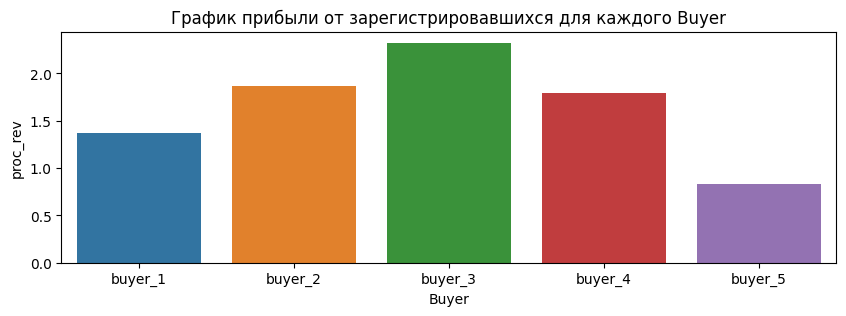

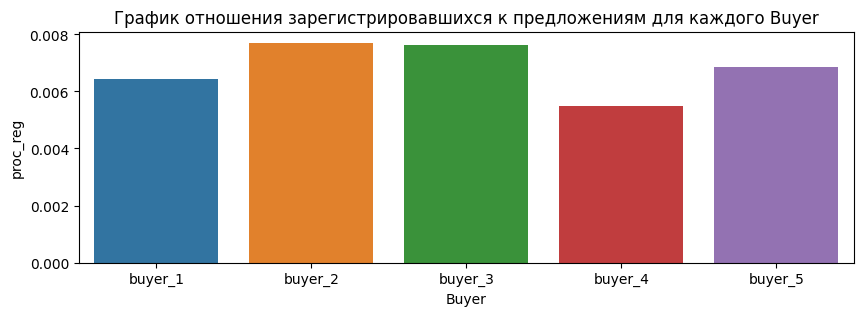

In [10]:
pl2(data_gr_buy, 'Buyer')

In [11]:
data_gr_geo =data.groupby(['Geo']).sum().iloc[:, 2: ]

In [12]:
data_gr_geo

,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
Geo,,,,,,,,,,,,,,
australia oceania,2185,53,10,9,21.549999,1.187304,0.000000,0,1.212664,0.000000,0,1.212664,0.000000,0
cis,729586,19846,7833,4069,1192.460001,349.701238,22.890000,13,479.703169,36.710000,17,575.662277,55.310000,19
latin america,522450,17728,5836,3507,356.529999,88.902061,6.680000,6,111.822346,8.220000,7,123.163132,16.880000,8
north africa,948653,32124,9660,7069,247.889999,20.412846,0.000000,0,24.468020,0.000000,0,27.086440,0.000000,0
north america,6801913,240776,72861,46175,14045.270010,6031.536440,438.380000,150,8114.138994,597.990001,185,9939.410108,842.400003,204
tropical africa,90894,2735,778,485,41.510000,5.473794,0.000000,0,6.159881,0.000000,0,6.451855,0.000000,0
western europe,827297,17729,8453,5594,2267.219999,1093.933091,24.620001,8,1534.090739,32.430001,13,1970.929752,50.550001,14


**График зависимости прибыли от зарегестрировавшихся на 1, 7, 30 дни для каждого geo**

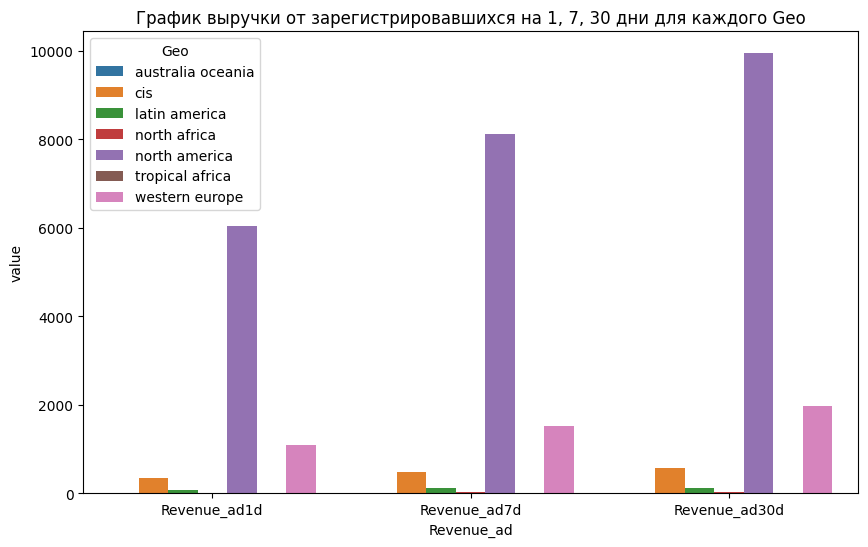

In [13]:
gr(data_gr_geo, 'Geo', figsize=(10,6))

**График зависимости затрат на каждого зарегистрировавшегося от geo**

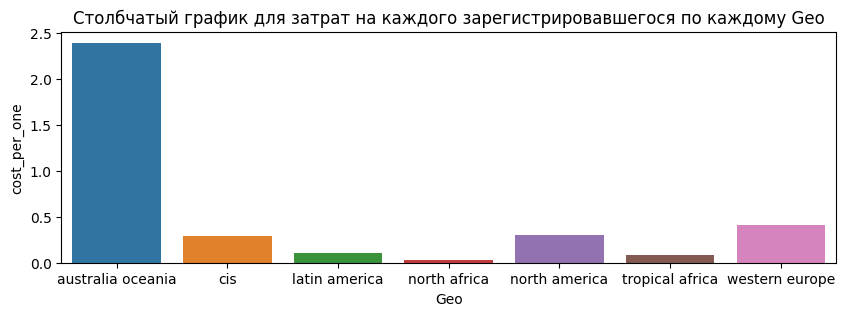

In [14]:
pl1(data_gr_geo, 'Geo')

**Как окупились затраты на рекламу с прибылью от зарегестрировавшихся и процент зарегистрировавшихся от предложений для каждого geo**

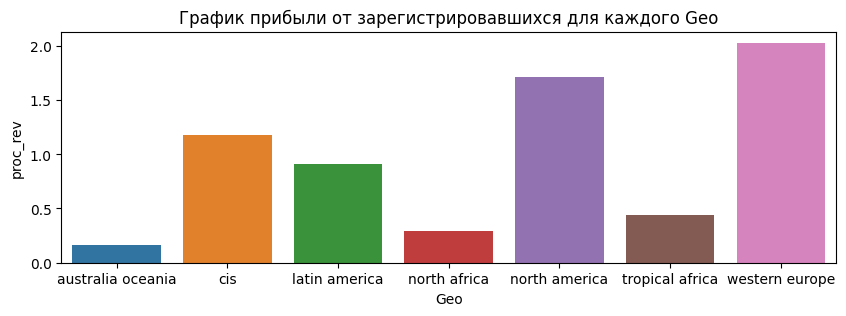

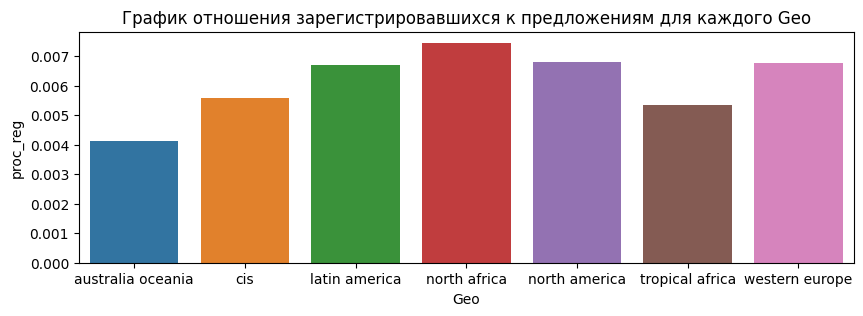

In [15]:
pl2(data_gr_geo, 'Geo')

## Вывод

Для каждого байера по графику видно, что с течением времени после начала рекламной компании результативность растёт. 
За период, равный 30 дням. То есть рекламная компания актуальна в течении данного периода.\
\
Больше всего затрат на каждого зарегистрировавшегося пользователя пришлось на 3ий байер, меньше всего на 5ый байер. 
При этом большую прибыль получил именно 3-ий байер, то есть затраты на него хорошо окупились, 
больший процент зарегистрировавшихся оказались выгодны, в отличии от других байеров. 5ый байер принёс убытки, 
в отличии от остальных байеров.\
\
Примерно 8% получивших рекламу - зарегестрировались в 3 и 2 байерах. Меньше всего заинтересованности проявил 4 байер с 5%
зарегистрировавшихся. 
При этом убыточный байер проявил неплохой отклик на рекламу и процент регистраций от предложений для него составил около 7%.\
\
В каждом регионе рекламная компания с течением времени также улучшала показатели. В период 30 дней. \
\
Больше всего затрат на каждого зарегистрировавшегося пришлось на Австралию, при этом рекламная компания оказалась самой
убыточной для этого региона. Тропическая Африка, примерно при тех же небольших общих затратах показала всё же лучшие показатели и скорее всего 
больше подходит для дальнейшего продвижения, чем Австралия, хотя и здесь рекламная компания оказалась убыточной.\
\
Прибыль принесли Западная Европа, Северная Америка, СНГ. Латинская Америка, Северная Африка, Тропическая Африка и Австралия
принесли убытки. Хотя Латинская Америка всё же выбивается из аутсайдеров и возможно ещё может показать лучшие результаты, чем остальные.\
\
При всём при этом больший отклик на рекламу или , если так можно сказать заинтересованность проявили в Северной Африке. Там
процент регистраций самый высокий и равен примерно 7%. Хотя конечно Северная Америка и Западная Европа может похвастать
либо более платёжеспособными клиентами, либо же более избирательными и скорее регистрируются с целью приобретения товара,
нежели в Африке. В Северной Америке, Западной Европе и Латинской Америке процент зарегистрировавшихся составляет около 6,5%.
Австралия здесь самая отстающая.\
\
Исходя из анализа, я бы рекомендовала больше вкладываться в Европу и Америку. Австралия по непонятным причинам не подходит
для подобных рекламных компаний. СНГ тоже представляет из себя хорошую почву для развития. Латинская Америка при более подробном
анализе и долженствующих изменений скорее всего может показать лучшие результаты. Африка соотносится с большими рисками для
вложений, нежели остальные регионы.
